Creating VGG16 and finetuning it.  This notebook is being created from scratch without reference to the original notebook.  The Vgg16.py model is used unchanged and this notebook is purely for instantiating it, modifying it using finetuning and retraining it.

Beyond that, the next steps would be to output information in a format to submit to kaggle

In [4]:
%matplotlib inline

Set up relative paths and other goodies

In [5]:
import utils; reload(utils)
from utils import plots

In [6]:
import pydot_ng;reload(pydot_ng)
import pydot_ng as pydot
import graphviz
#from graphviz import Digraph
f=pydot_ng.find_graphviz()
print f

{'twopi': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\twopi.exe', 'fdp': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\fdp.exe', 'circo': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\circo.exe', 'neato': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\neato.exe', 'dot': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe', 'sfdp': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\sfdp.exe'}


In [7]:
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#from keras.utils.visualize_util import plot
from keras.utils.data_utils import get_file
#import pydot
from keras.utils.visualize_util import plot
#from keras.utils.plot_utils import plot_model

#from keras.utils.dot_utils import Grapher
#plot_model(vgg16, to_file='model.png')

path = "data/dogscats/sample"


Load training batches and validation batches
Set a batch size to match the memory available

In [8]:
import vgg16;reload(vgg16)
from vgg16 import Vgg16
vgg16 = Vgg16()

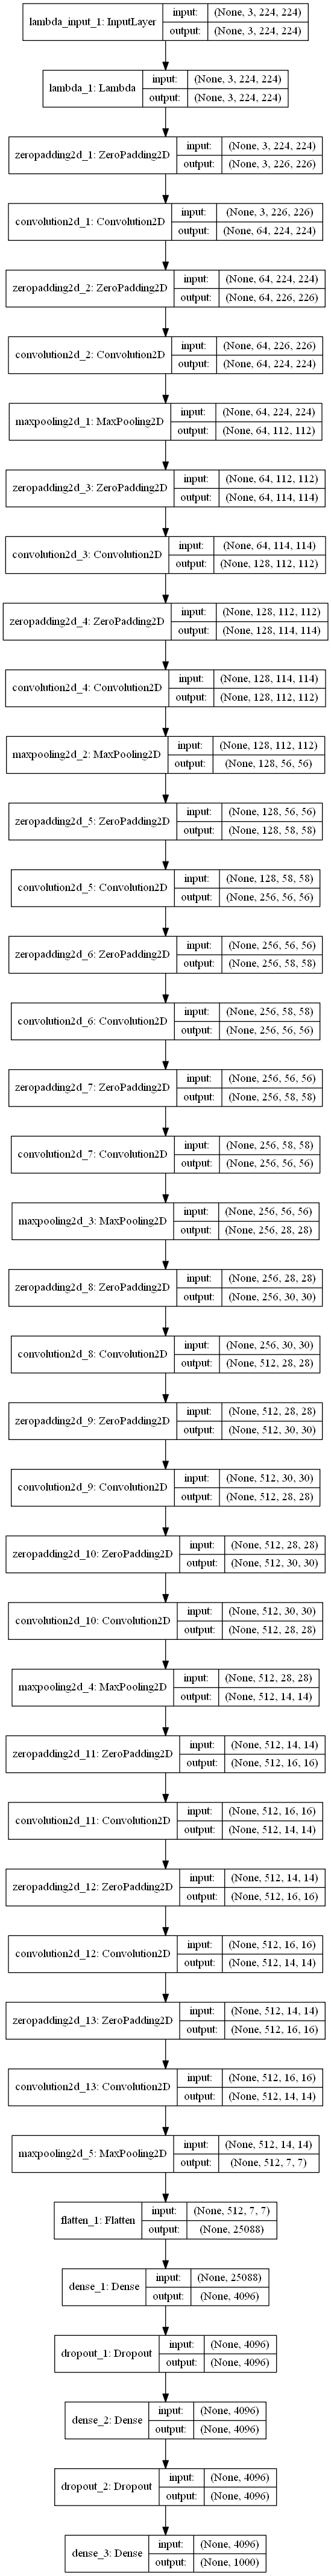

In [9]:
plot(vgg16.model, show_shapes=True)
from IPython.display import Image
Image("model.png")


In [10]:
batch_size = 8

train_batches=vgg16.get_batches(path+'/train', batch_size=batch_size)
valid_batches=vgg16.get_batches(path+'/valid',batch_size=batch_size)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
vgg16.finetune(train_batches)

In [12]:
vgg16.fit(train_batches,valid_batches)

Epoch 1/1
160/160 [==============================] - 57s - loss: 0.3655 - acc: 0.8125 - val_loss: 0.0864 - val_acc: 0.9750

In [13]:
testpath = "data/test"
testpath="data/dogscats/sample/test"
batches, preds =vgg16.test(testpath)

Found 166 images belonging to 1 classes.


In [1]:
import numpy as np
print preds[:5]
print batches.filenames[:5]
filenames = batches.filenames
ids=np.array([int(f[8:f.find('.')]) for f in filenames])
print ids
isDog = preds[:,1]
#isDog = isDog.clip(min=0.05, max=0.95)
kaggleArr = np.stack([ids, isDog],axis=1)
print kaggleArr
submission_file_name = path+'/submission1.csv'
np.savetxt(submission_file_name, kaggleArr, fmt='%d,%.5f', header='id,label', comments='')


NameError: name 'preds' is not defined

Need to visualize good and bad predictions. Also look at the loss function in the Kaggle competition
